In [236]:
#importaçoes
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

In [178]:
df = pd.read_csv('C:\\Users\\souza\\Downloads\\Projeto 2 -revisão de produtividade de funcionários\\garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Estatistica descritiva

In [179]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [180]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [181]:
#substituiçao de dados nulos pela mediana 
df['wip'] = df['wip'].interpolate(method='linear', limit_direction='forward')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [183]:
df['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [184]:
df['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [185]:
df['date'] = pd.to_datetime(df['date'])

EDA


Analise Univariada 

In [186]:
#separaçao dados numericos e dados categoricos 
num_col = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
cat_col = df.select_dtypes(exclude=['number', 'datetime64[ns]']).columns

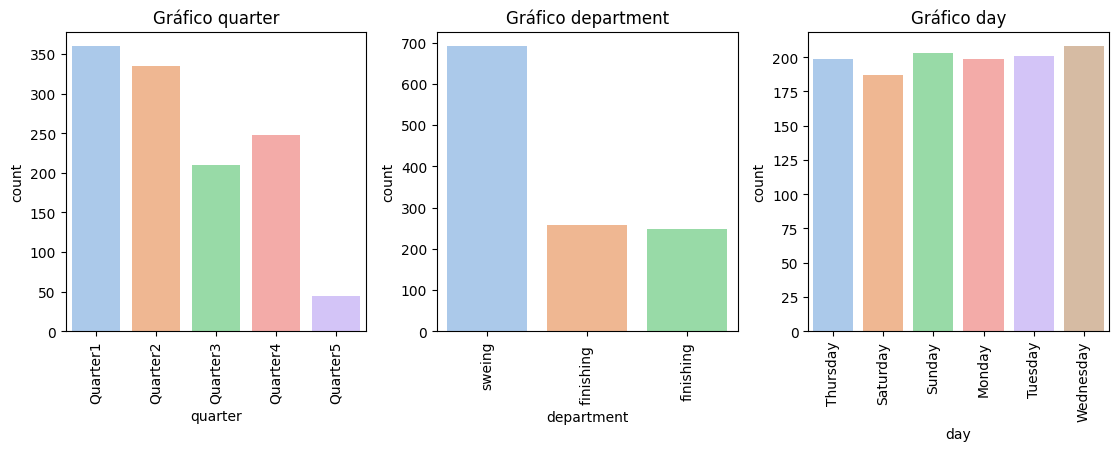

In [187]:
#distribuiçao dados categoricos
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, cat in enumerate(cat_col):
    sns.countplot(data=df, x=cat, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Gráfico {cat}')
    axes[i].tick_params(axis='x', rotation=90)
for j in range(len(cat_col), 12):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

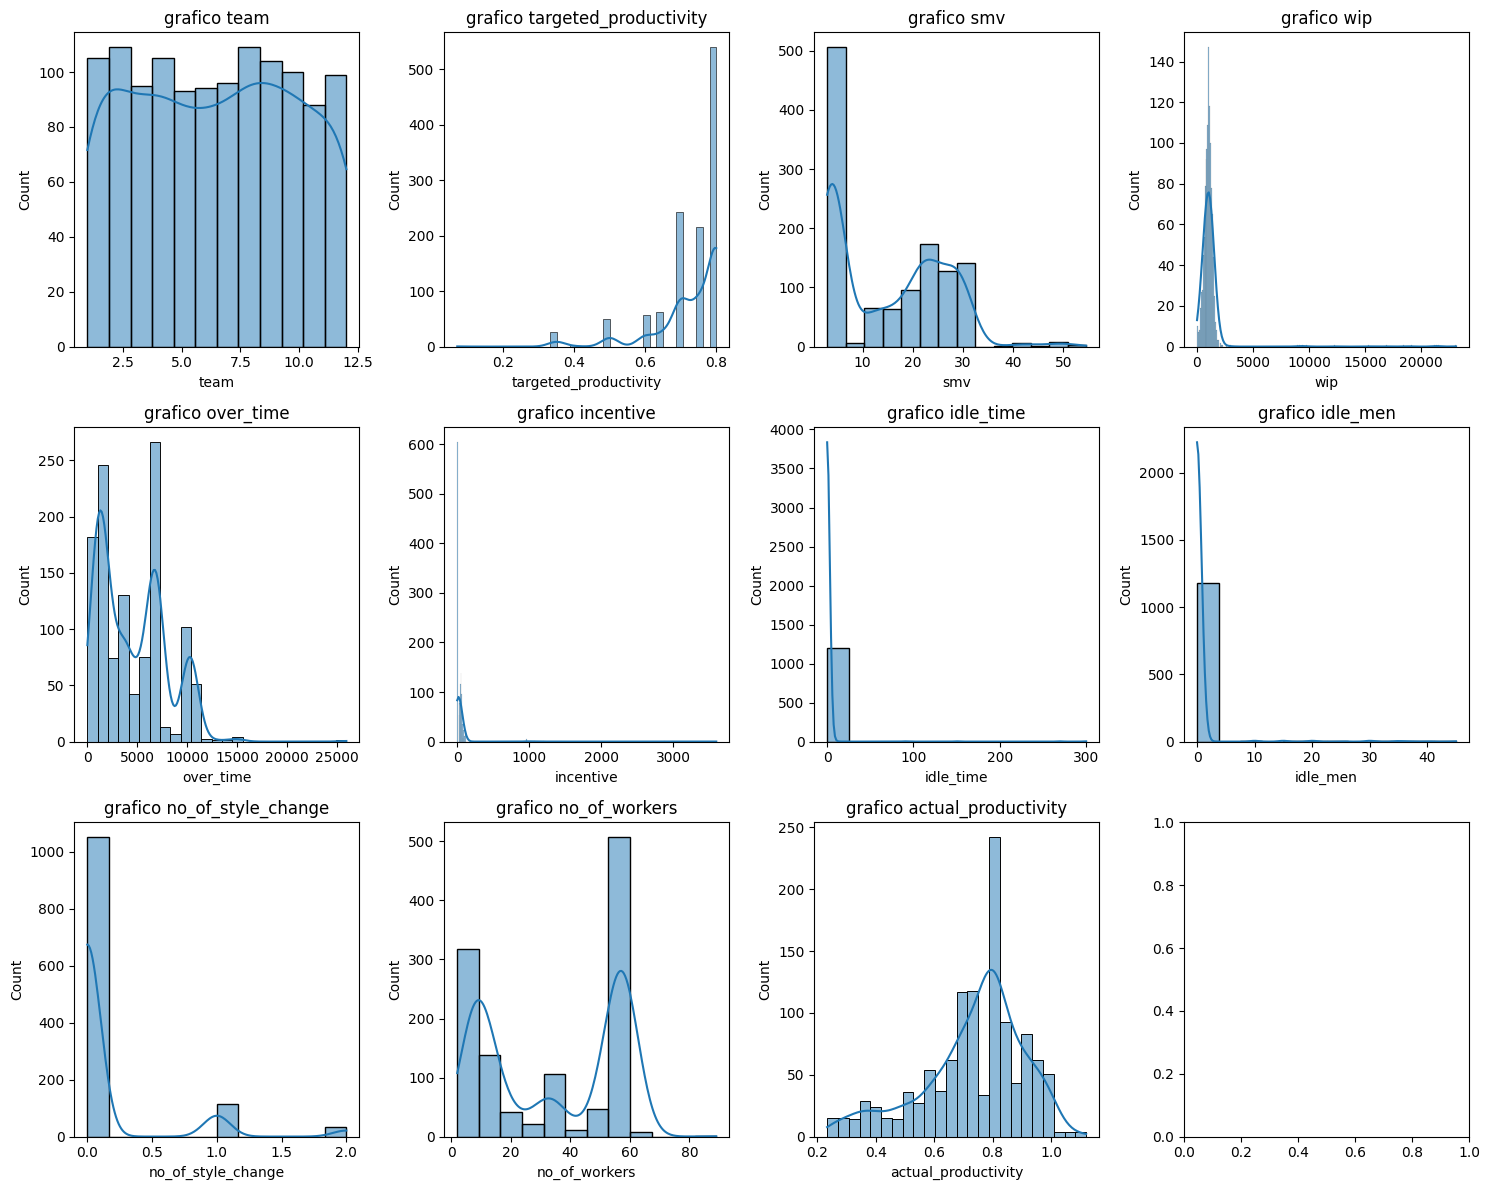

In [188]:
#distribuiçao dados numericos
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.histplot(df[num], kde=True, ax=axes[i], palette='pastel')
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()


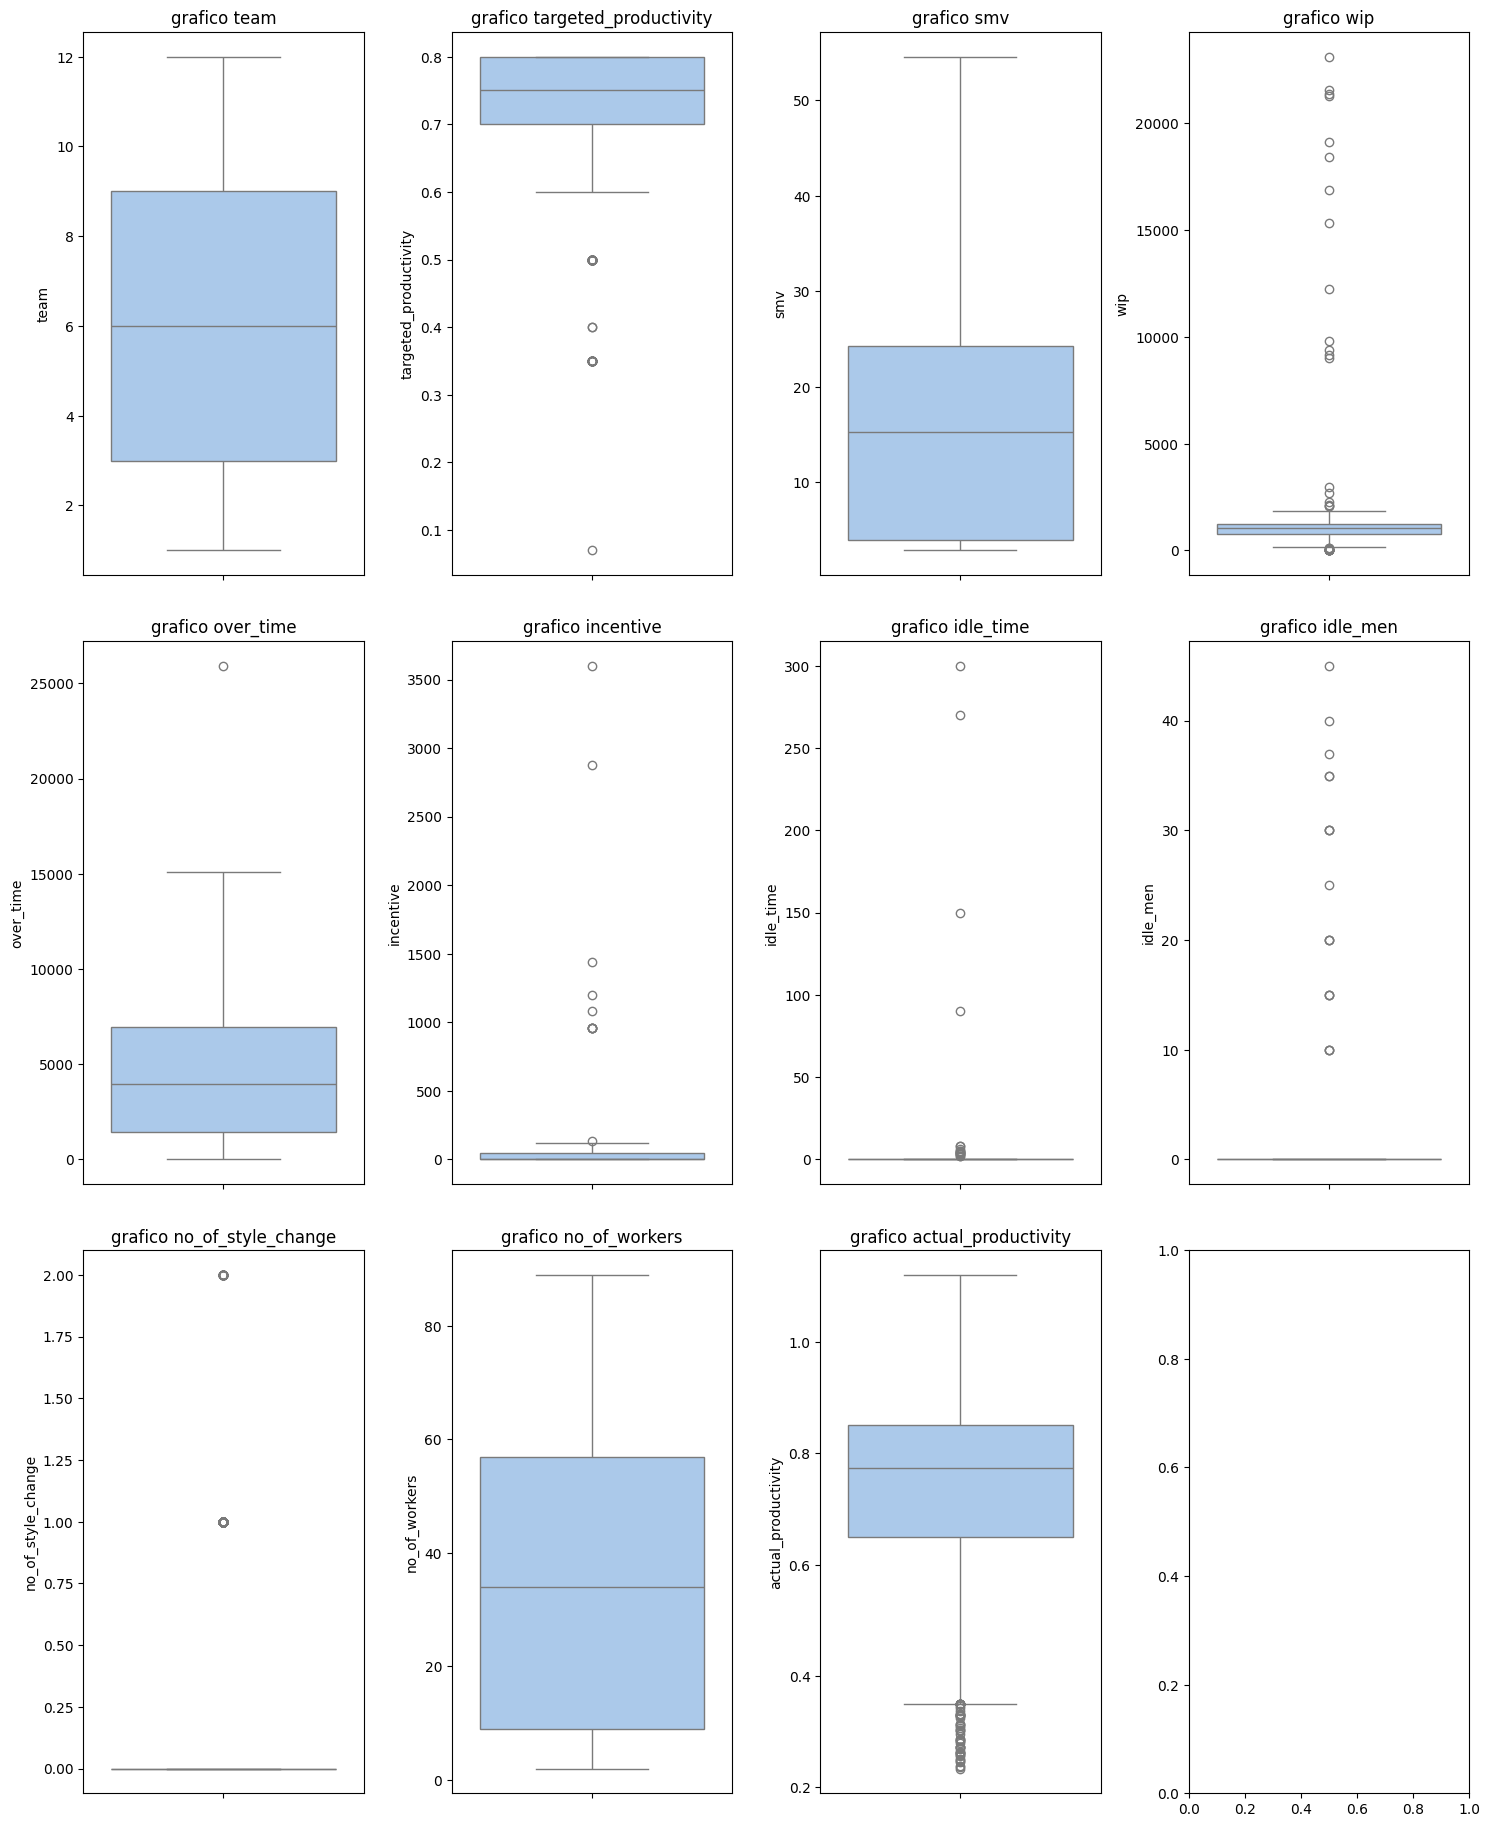

In [189]:
#vizualizaçao em caixa colunas numericas 
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.boxplot(df[num], ax=axes[i], palette='pastel')
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()


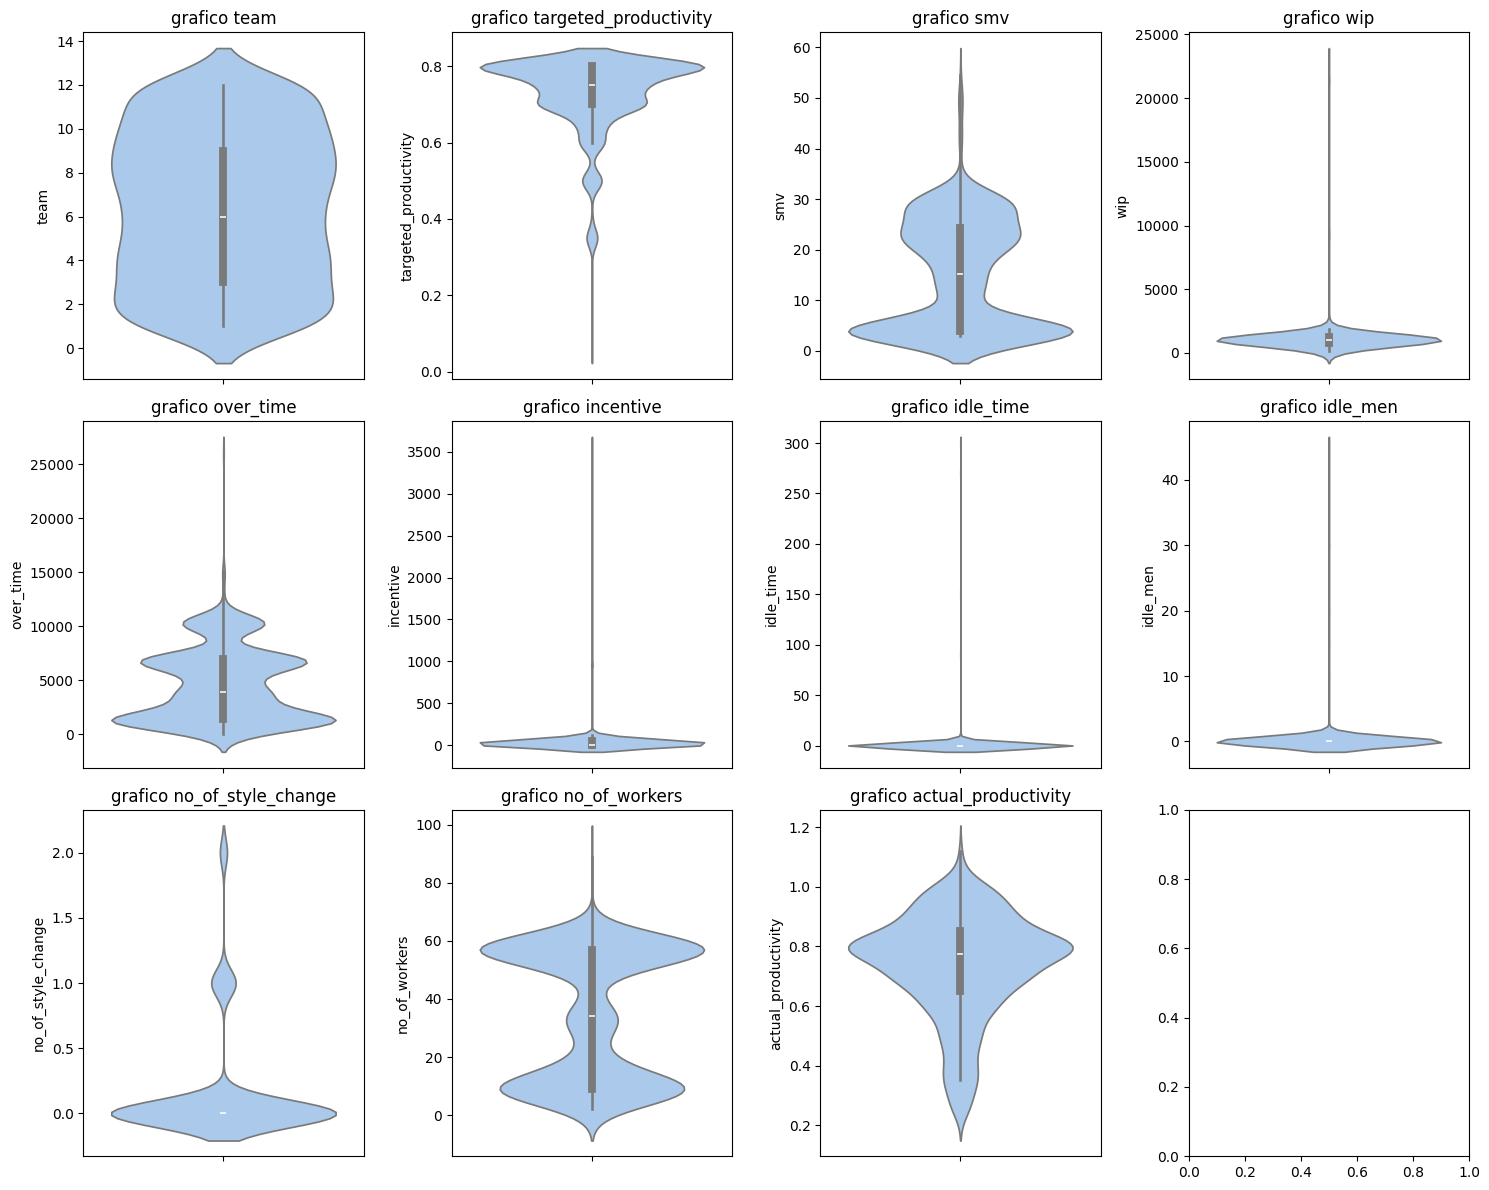

In [190]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.violinplot(df[num], ax=axes[i], palette='pastel')
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()


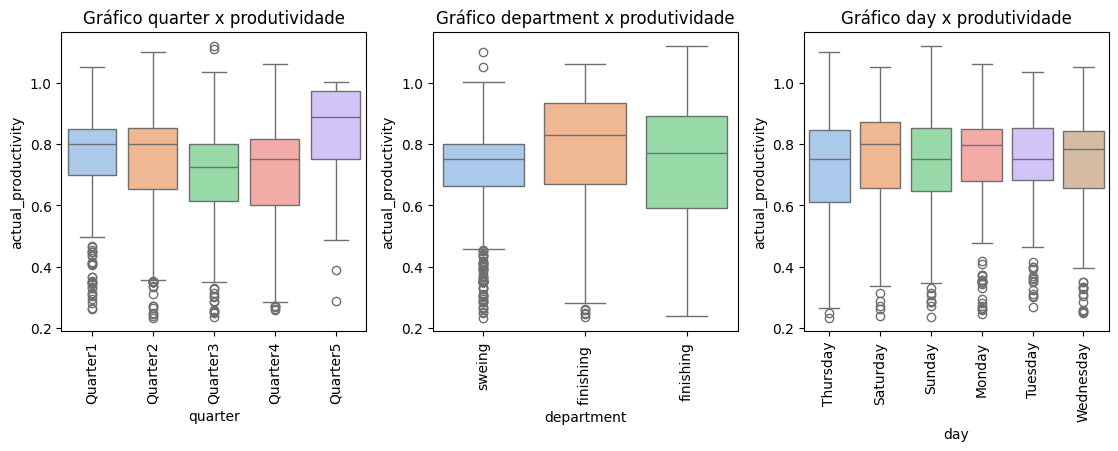

In [191]:
#plot colunas cat x produtividade 
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, cat in enumerate(cat_col):
    sns.boxplot(x=df[cat], y = df['actual_productivity'], ax=axes[i], palette='pastel')
    axes[i].set_title(f'Gráfico {cat} x produtividade')
    axes[i].tick_params(axis='x', rotation=90)
for j in range(len(cat_col), 12):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

In [192]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

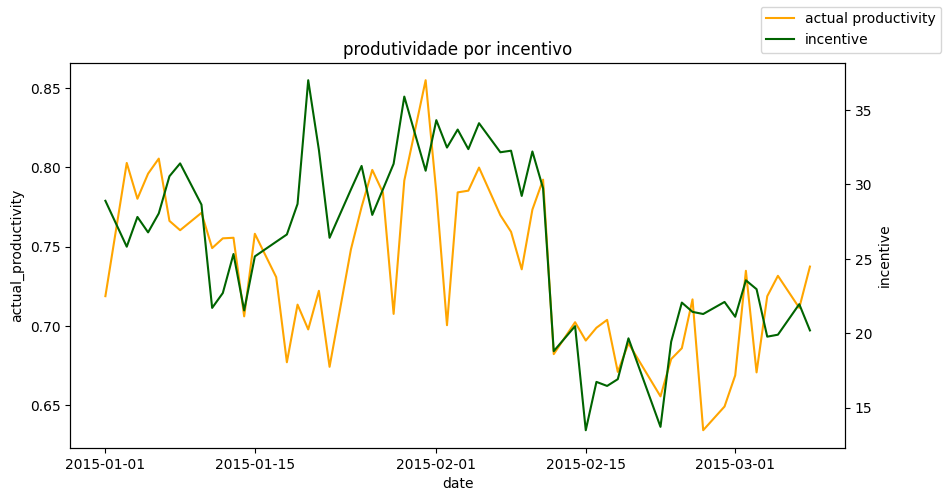

In [193]:
#plot incentive x actual_productivity
df_dt = df[df.date <= pd.to_datetime('2015-03-08')]
plt.figure(figsize=(10,5))
plt.title('produtividade por incentivo')
line1 = sns.lineplot(x='date', y='actual_productivity', data=df_dt, ci= None, color='orange', legend=False, label = 'actual productivity' )
ax2 = line1.twinx()
line2 = sns.lineplot(x='date', y='incentive', data=df_dt, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'incentive')
line1.figure.legend()

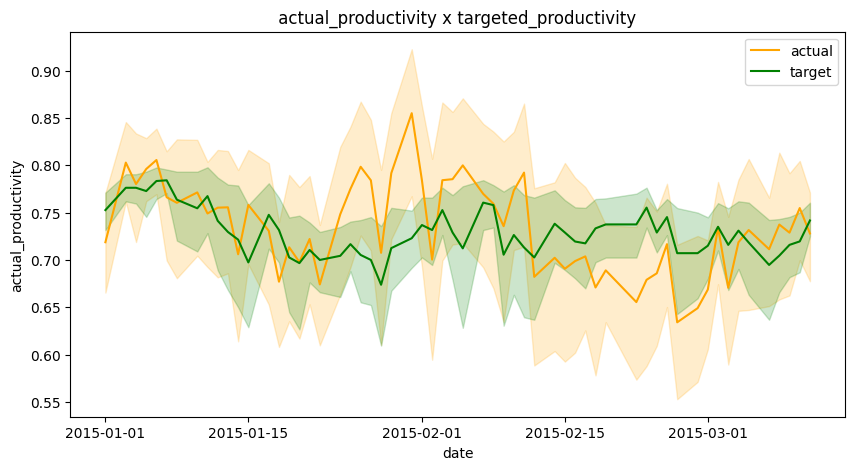

In [194]:
#analise temporal actual_productivity x targeted_productivity 
plt.figure(figsize=(10,5))
plt.title(' actual_productivity x targeted_productivity ')
sns.lineplot(data=df,x='date', y='actual_productivity', color='orange',label='actual')
sns.lineplot(data=df,x='date', y='targeted_productivity', color='green', label='target')
plt.legend()
plt.show()

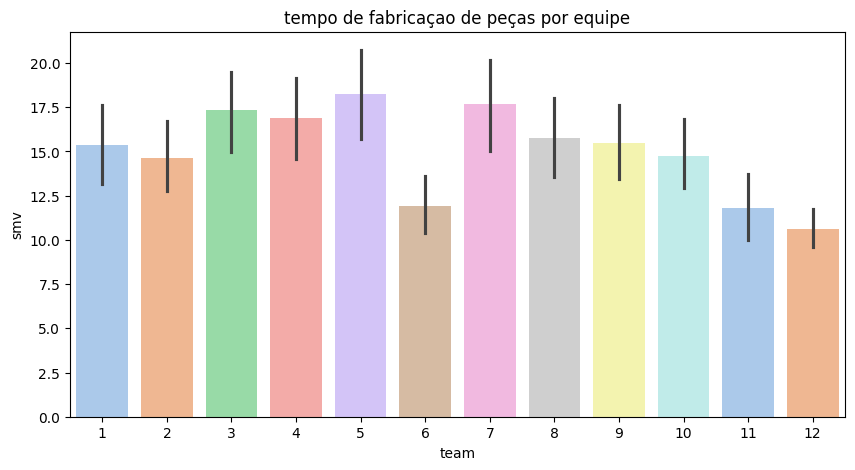

In [195]:
#tempo de fabricaçao de peças por equipes 
plt.figure(figsize=(10,5))
plt.title('tempo de fabricaçao de peças por equipe')
sns.barplot(data=df, x='team', y='smv', palette='pastel')
plt.show()


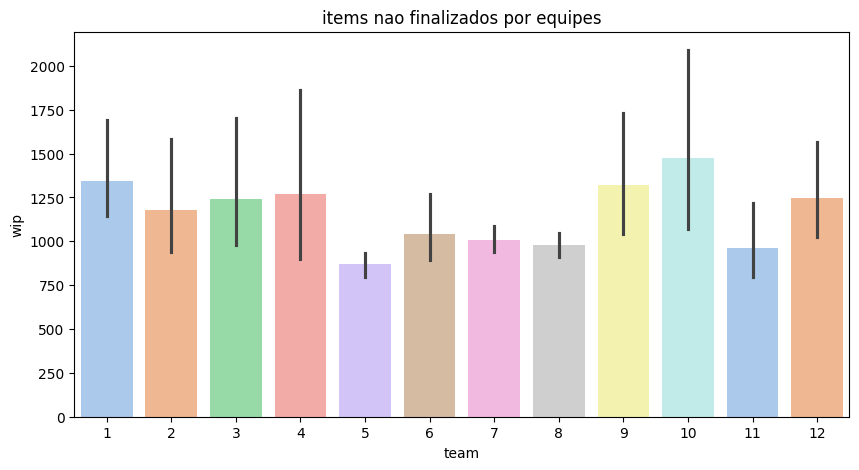

In [196]:
#items nao finalizados por equipes
plt.figure(figsize=(10,5))
plt.title('items nao finalizados por equipes')
sns.barplot(x=df['team'], y= df['wip'], palette='pastel')
plt.show()


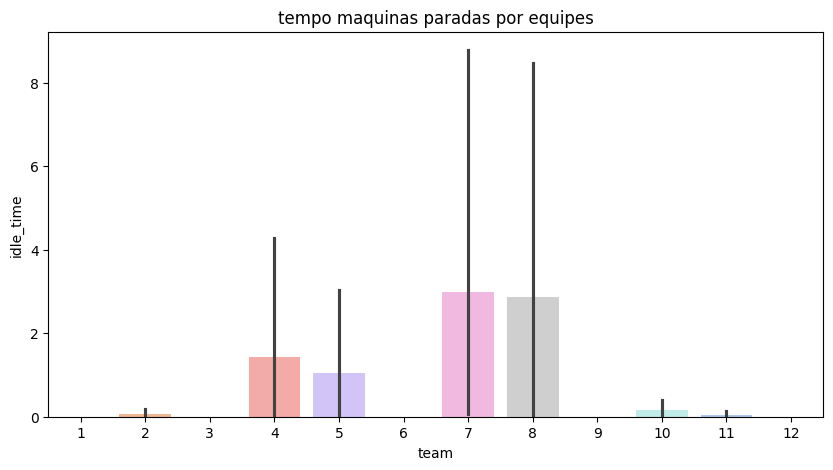

In [197]:
#tempo maquina parada por equipe 
plt.figure(figsize=(10,5))
plt.title('tempo maquinas paradas por equipes')
sns.barplot(x=df['team'], y=df['idle_time'], palette='pastel') 
plt.show()


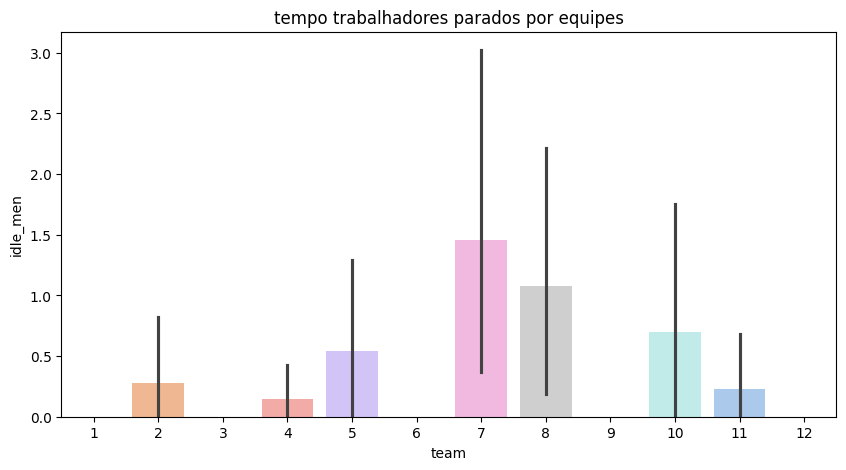

In [198]:
#tempo trabalhadores parados por equipes 
plt.figure(figsize=(10,5))
plt.title('tempo trabalhadores parados por equipes')
sns.barplot(x=df['team'], y=df['idle_men'], palette='pastel')
plt.show()

In [199]:
#aqui selecionei algumas features que podem ter relaçao linear com a produtividade
#por exemplo:relacao temo para produzir uma peça x produtividade 
some_features = ['smv', 'targeted_productivity', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers'
    
]

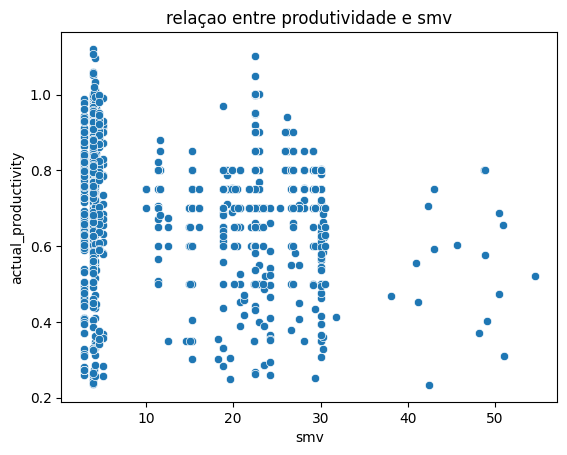

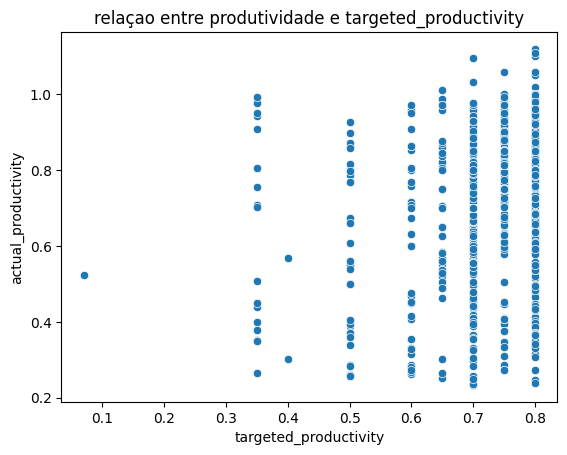

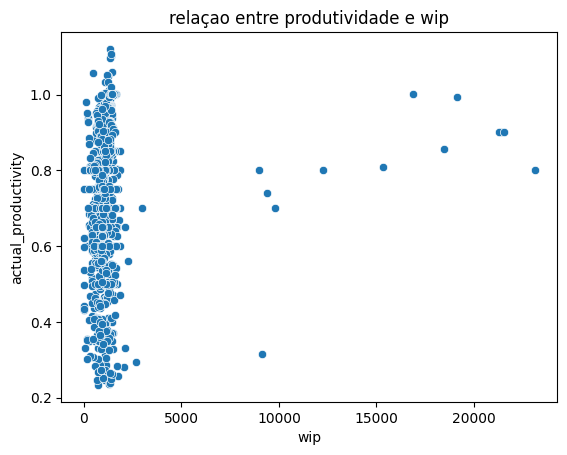

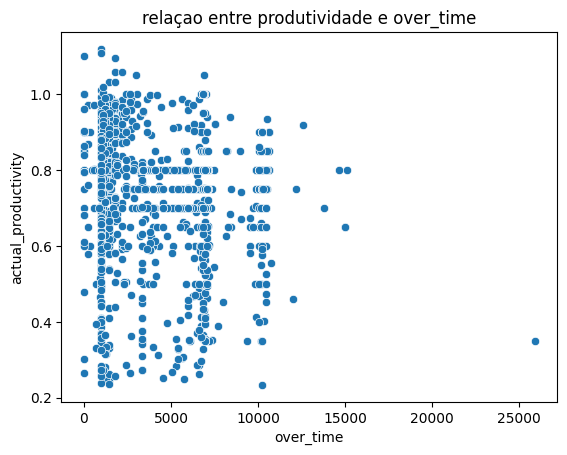

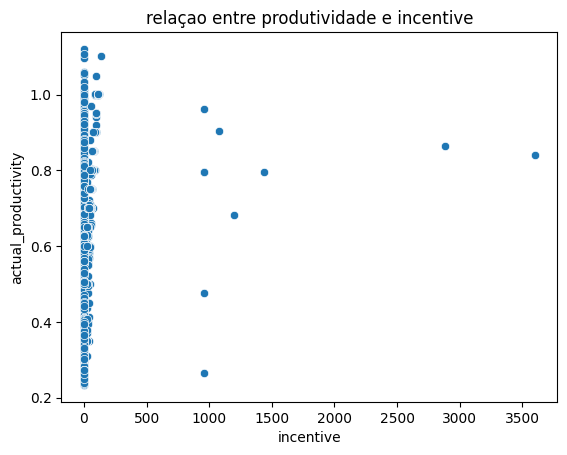

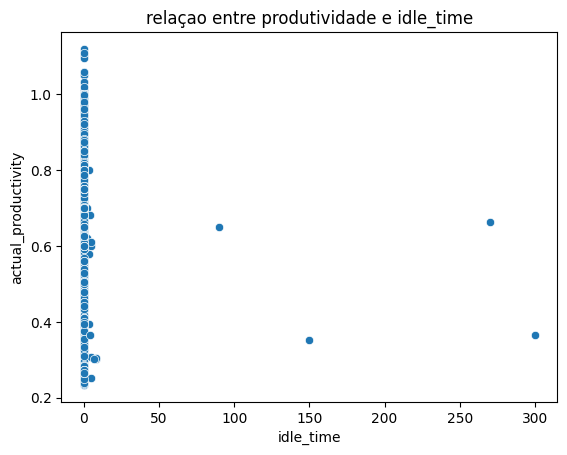

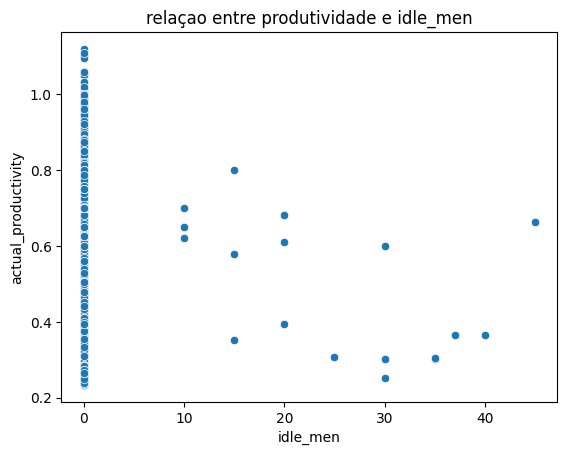

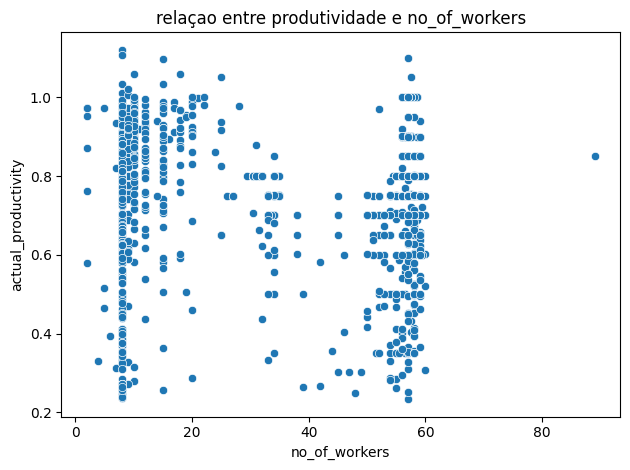

In [200]:
#plotagem das features x produtividade
for i, prod in enumerate(some_features):
    plt.figure()
    plt.title(f'relaçao entre produtividade e {prod}')
    sns.scatterplot(data=df, x=prod, y='actual_productivity', palette='pastel')
plt.tight_layout()
plt.show()

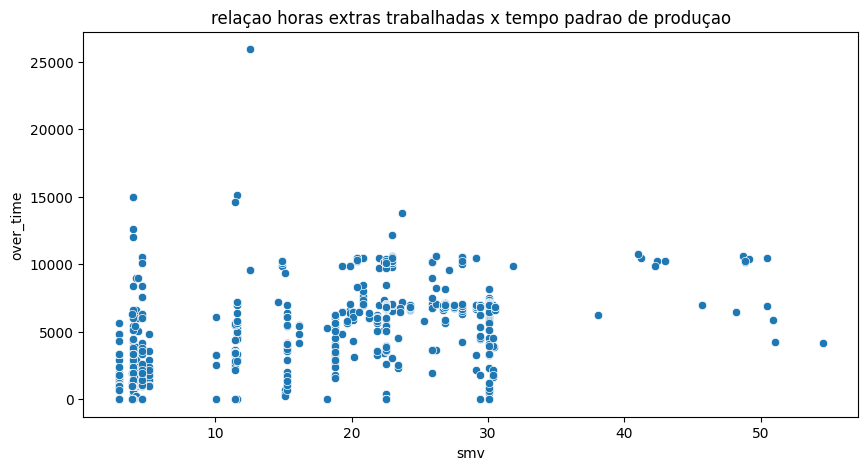

In [201]:
plt.figure(figsize=(10,5))
plt.title('relaçao horas extras trabalhadas x tempo padrao de produçao')
sns.scatterplot(x=df['smv'], y= df['over_time'])
plt.show()

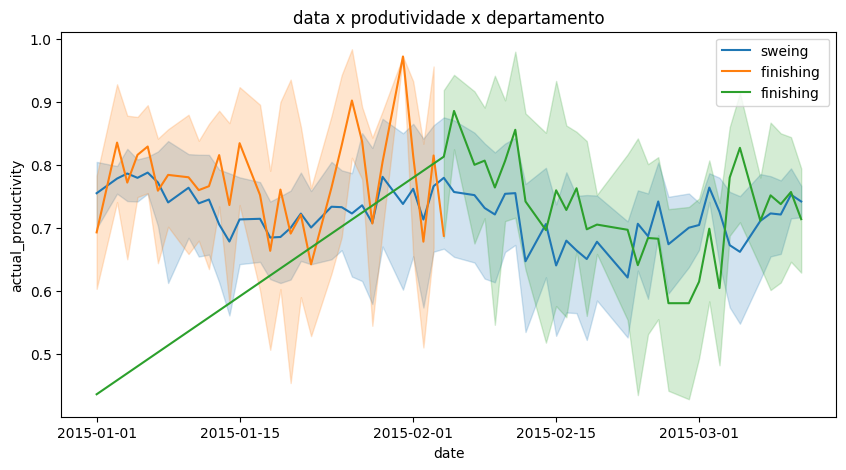

In [202]:
#data x produtividade x departamento
plt.figure(figsize=(10,5))
plt.title('data x produtividade x departamento')
sns.lineplot(data=df, x='date', y='actual_productivity', hue='department')
plt.legend()
plt.show()


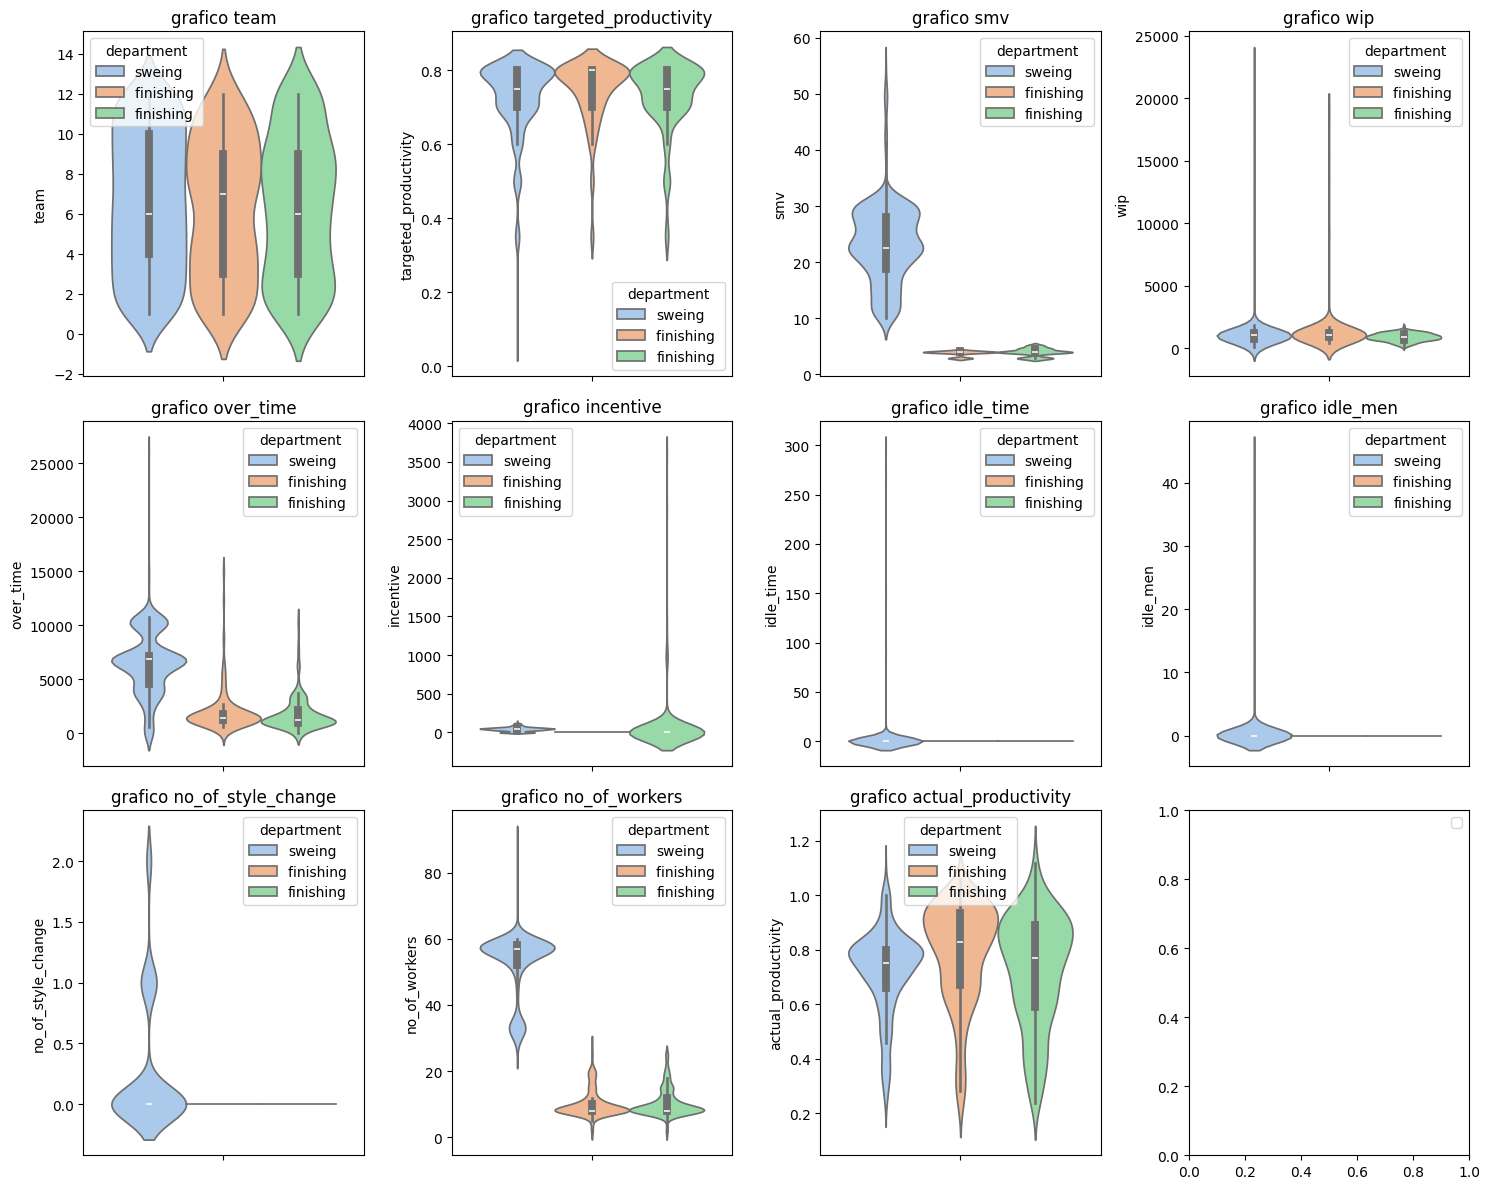

In [203]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()
for i, num in enumerate(num_col):
    sns.violinplot(y=df[num], ax=axes[i], palette='pastel', hue=df['department'])
    axes[i].set_title(f'grafico {num}')
for j in range(len(num_col), 9):
    axes[j].set_visible(False)
plt.tight_layout()
plt.legend()
plt.show()


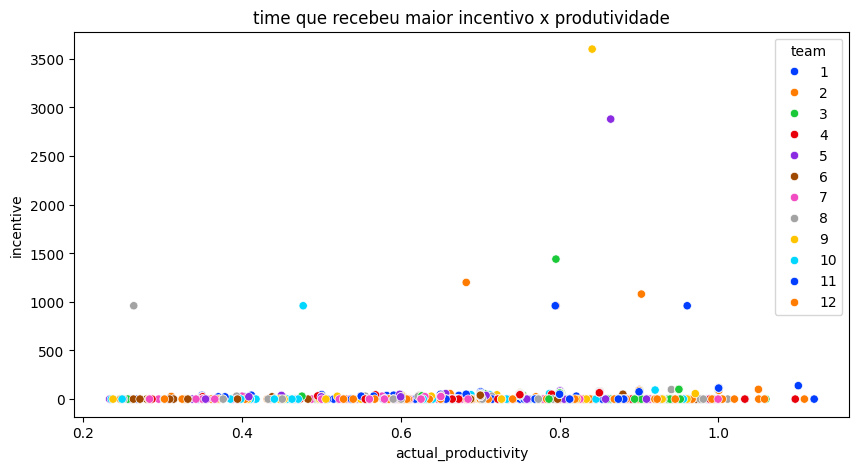

In [204]:
#analise time que recebeu maior incentivo x produtividae
plt.figure(figsize=(10,5))
plt.title('time que recebeu maior incentivo x produtividade')
sns.scatterplot(data=df, x='actual_productivity', y='incentive', hue='team', palette='bright')
plt.show()

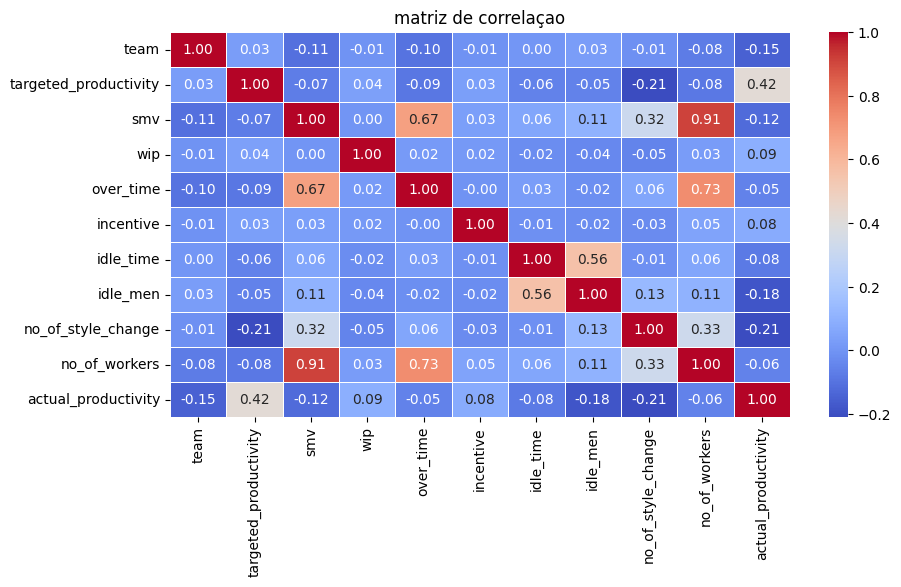

In [205]:
#matriz de correlaçao entre variaveis 
plt.figure(figsize=(10,5))
plt.title('matriz de correlaçao')
sns.heatmap(num_col.corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.show()

Criaçao de novas features

In [206]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [207]:
#criaçao de novas features
df['prod_per_worker'] = df['actual_productivity']/df['no_of_workers']
df['diference_prod_targeted_actual'] = df['actual_productivity'] - df['targeted_productivity']
df['time_per_worker'] = df['smv']/ df['no_of_workers']
df['idle_men_percent'] = df['idle_men']/df['no_of_workers']
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,prod_per_worker,diference_prod_targeted_actual,time_per_worker,idle_men_percent
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.015944,0.140725,0.443390,0.0
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1038.0,960,0,0.0,0,0,8.0,0.886500,0.110812,0.136500,0.492500,0.0
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.026248,0.000570,0.374098,0.0
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.026248,0.000570,0.374098,0.0
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.014293,0.000382,0.462500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,935.0,960,0,0.0,0,0,8.0,0.628333,0.078542,-0.121667,0.362500,0.0
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,935.0,960,0,0.0,0,0,8.0,0.625625,0.078203,-0.074375,0.487500,0.0
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,935.0,960,0,0.0,0,0,8.0,0.625625,0.078203,-0.024375,0.487500,0.0
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,935.0,1800,0,0.0,0,0,15.0,0.505889,0.033726,-0.244111,0.193333,0.0


In [208]:
new_features = ['prod_per_worker','diference_prod_targeted_actual',  'time_per_worker', 'idle_men_percent']

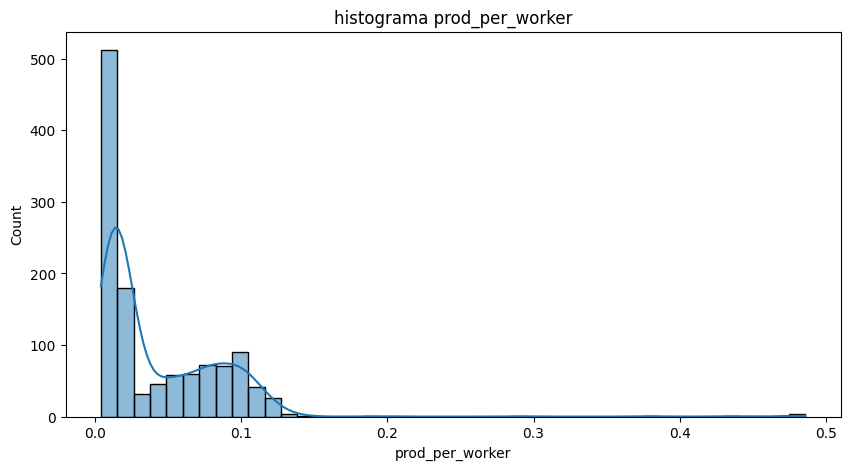

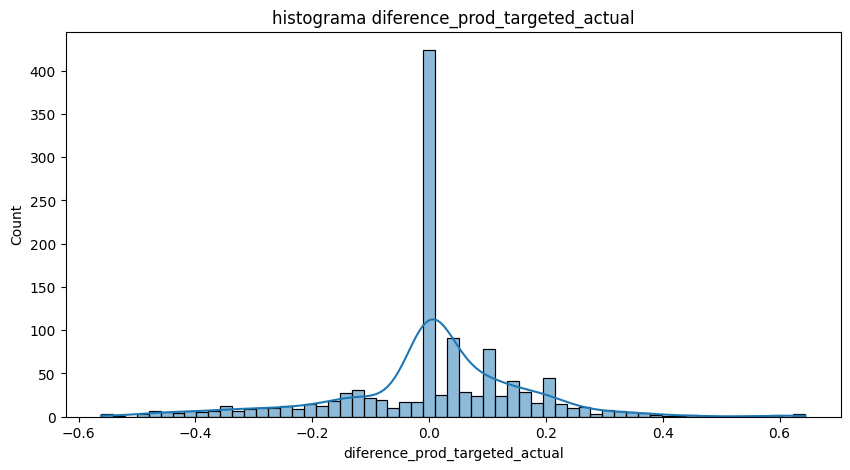

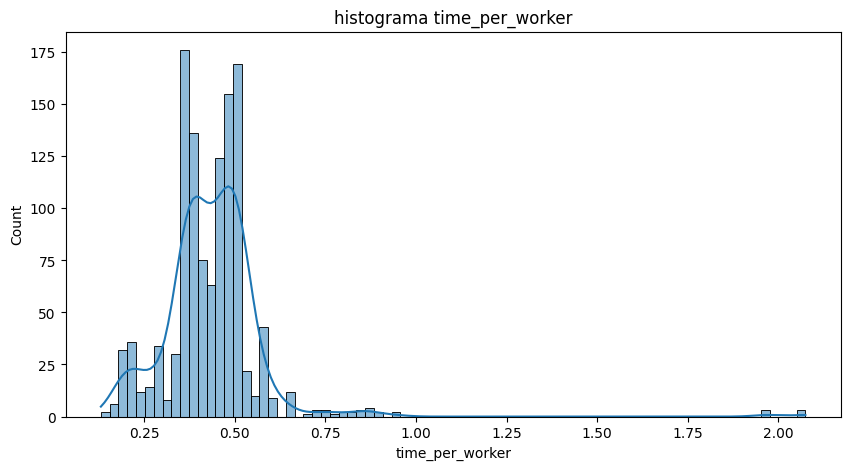

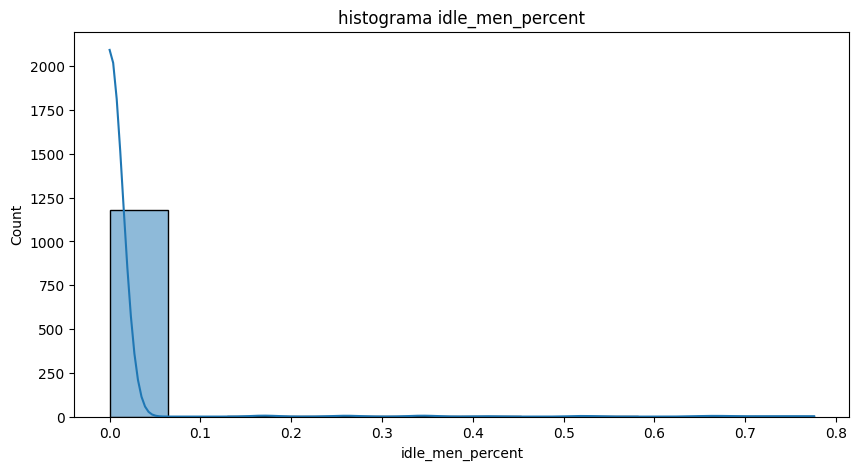

In [209]:
for hist in new_features:
    plt.figure(figsize=(10,5))
    plt.title(f'histograma {hist}')
    sns.histplot(df[hist], kde=True)
plt.show()

In [210]:
new_num_col = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
new_num_col

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,prod_per_worker,diference_prod_targeted_actual,time_per_worker,idle_men_percent
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.015944,0.140725,0.443390,0.0
1,1,0.75,3.94,1038.0,960,0,0.0,0,0,8.0,0.886500,0.110812,0.136500,0.492500,0.0
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.026248,0.000570,0.374098,0.0
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.026248,0.000570,0.374098,0.0
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.014293,0.000382,0.462500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,935.0,960,0,0.0,0,0,8.0,0.628333,0.078542,-0.121667,0.362500,0.0
1193,8,0.70,3.90,935.0,960,0,0.0,0,0,8.0,0.625625,0.078203,-0.074375,0.487500,0.0
1194,7,0.65,3.90,935.0,960,0,0.0,0,0,8.0,0.625625,0.078203,-0.024375,0.487500,0.0
1195,9,0.75,2.90,935.0,1800,0,0.0,0,0,15.0,0.505889,0.033726,-0.244111,0.193333,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

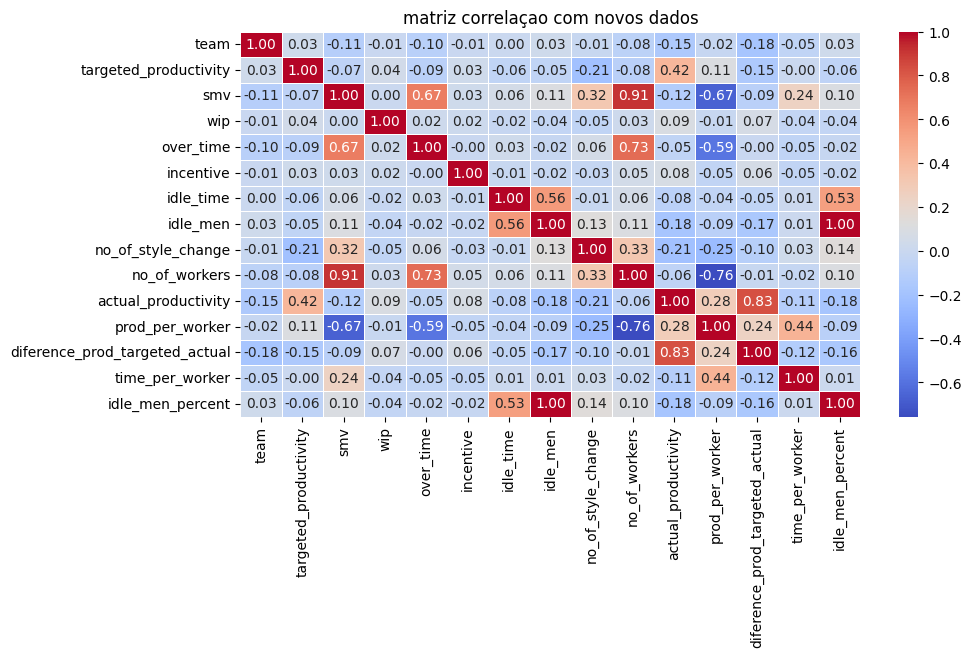

In [211]:
#plotando nova matriz de correlaçao
plt.figure(figsize=(10,5))
plt.title('matriz correlaçao com novos dados')
sns.heatmap(new_num_col.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.show

Modelagem 

In [212]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'prod_per_worker', 'diference_prod_targeted_actual', 'time_per_worker',
       'idle_men_percent'],
      dtype='object')

In [213]:
x = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

In [214]:
x.shape, y.shape

((1197, 18), (1197,))

In [215]:
#split
split_size = 0.9
train_size = int(len(df) * split_size)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [216]:
x_train.shape, x_test.shape

((1077, 18), (120, 18))

In [217]:
y_train.shape, y_test.shape

((1077,), (120,))

In [218]:
new_num_col.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'prod_per_worker',
       'diference_prod_targeted_actual', 'time_per_worker',
       'idle_men_percent'],
      dtype='object')

In [219]:
cat_col

Index(['quarter', 'department', 'day'], dtype='object')

In [220]:
#separaáo de atributos 
num_atribs = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'prod_per_worker',
       'diference_prod_targeted_actual', 'time_per_worker',
       'idle_men_percent']
        
cat_atribs = ['quarter', 'department', 'day']

In [226]:
num_pipeline = Pipeline([
    ('robust_scaler', RobustScaler()),
])

In [227]:
column_tranf = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_atribs),  
    ('1hot_enc', OneHotEncoder(), cat_atribs)   
])

In [228]:
pipe = Pipeline([('transform', column_tranf),
                ('model', DecisionTreeRegressor())
    
])

In [238]:
pipe.set_params(model=DecisionTreeRegressor()).fit(x_train, y_train)
pipe_pred = pipe.predict(x_test)


In [261]:
result_list = []
def metrics( y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) 
    mean_percent = mean_absolute_percentage_error(y_test, y_pred)
    results = {
        'mse':mse,
        'mae':mae,
        'r2':r2,
        'mean_percent':mean_percent
    }
    result_list.append({'mse':results['mse'],
                    'mae':results['mae'],
                    'r2':results['r2'],
                    'mean_percent':results['mean_percent']})
    return pd.DataFrame(result_list)

In [262]:
metrics(y_test=y_test, y_pred=pipe_pred)

,mse,mae,r2,mean_percent
0,0.001263,0.014337,0.944551,0.024922
